In [6]:
import numpy as np
import matplotlib.pyplot as plt
from phoebe.dependencies import distl
import phoebe
from astropy import units as u
from astropy import constants as c
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
%matplotlib inline

In [8]:
twigs = ['t0_supconj@binary@orbit@component',
       'period@binary@orbit@component',
       'requivsumfrac@binary@orbit@component',
       'requivratio@binary@orbit@component',
       'incl@binary@orbit@component', 'esinw@binary@orbit@component',
       'ecosw@binary@orbit@component', 'teff@primary@star@component',
       'teffratio@binary@orbit@component', 'q@binary@orbit@component',
       'sma@primary@star@component', 'vgamma@system',
       'syncpar@primary@star@component',
       'syncpar@secondary@star@component',
       'pblum@primary@lc01@lc@dataset', 'sigmas_lnf@lc01@lc@dataset',
       'sigmas_lnf@primary@rv01@rv@dataset',
       'gravb_bol@primary@star@component',
       'gravb_bol@secondary@star@component',
       'irrad_frac_refl_bol@primary@star@component',
       'irrad_frac_refl_bol@secondary@star@component']

means = [ 2.45869602e+06,  5.14194256e+01,  7.01756210e-02,  4.65176172e-01,
        8.63545929e+01,  1.47944549e-01,  3.95528097e-01,  1.19584532e+04,
        9.68317907e-01,  2.68727936e-01,  4.45833284e+01, -1.16998824e+01,
        3.74168005e+00,  7.22169251e+00,  1.04412535e+01, -8.03790675e+00,
       -4.56741364e+00,  7.00001364e-01,  4.49370042e-01,  1.61213204e-01,
        8.13600760e-01]

uncs = [6.06129412e-04, 2.03214204e-04, 1.56032753e-04, 1.61364968e-03,
       7.29691467e-03, 1.18708904e-03, 9.59467810e-05, 4.63036502e+02,
       8.41366182e-03, 6.90052450e-02, 1.31579731e-01, 4.60139708e-02,
       1.22763669e+00, 3.86295210e+00, 3.16993450e-02, 2.99729996e-02,
       1.59419106e-01, 1.16374179e-01, 1.56630663e-01, 2.08687721e-01,
       7.23715085e-02]

In [9]:
lc_tess = np.loadtxt('data/photometry/lc_resubmit.txt')
lc_tess[:,0] = lc_tess[:,0]+2457000
rv1_song = np.loadtxt('data/RV/SONG_LSD.txt')
rv1_song[:,0]=rv1_song[:,0]+2400000

In [10]:
b = phoebe.default_binary()
b.add_dataset('lc', times=lc_tess[:,0], fluxes=lc_tess[:,1], sigmas=lc_tess[:,2], passband='TESS:T')
b.add_dataset('rv', component='primary', times=rv1_song[:,0], rvs=rv1_song[:,1], sigmas=rv1_song[:,2])

<ParameterSet: 81 parameters | contexts: figure, dataset, constraint, compute>

In [11]:
b.add_constraint('requivsumfrac')
b.add_constraint('requivratio')
b.add_constraint('teffratio')

b.flip_constraint('requivsumfrac', solve_for='requiv@primary')
b.flip_constraint('requivratio', solve_for='requiv@secondary')
b.flip_constraint('teffratio', solve_for='teff@secondary')

b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')

<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 0.0 deg>

In [12]:
b.flip_constraint('sma@primary', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = {sma@primary@component} * ((1.000000 / {q@binary@component}) + 1.000000) (solar units) => 5.3 solRad>

In [13]:
b.set_value_all('gravb_bol', 1.0)
b.set_value_all('irrad_frac_refl_bol', 1.0)

In [14]:
for twig, mean, unc in zip(twigs, means, uncs):
    b.set_value(twig, value=mean)
    b.add_distribution(twig, phoebe.gaussian(mean, unc), distribution='sample_init')

In [15]:
b.add_distribution('t0_supconj', phoebe.uniform(2458695,2458697), distribution='upriors')
b.add_distribution('period@binary', phoebe.uniform(50.4,52.4), distribution='upriors')
b.add_distribution('esinw', phoebe.uniform(-1.,1), distribution='upriors')
b.add_distribution('ecosw', phoebe.uniform(-1.,1), distribution='upriors')
b.add_distribution('q', phoebe.uniform(0.1,1.1), distribution='upriors')
b.add_distribution('incl@binary', phoebe.uniform(80,90), distribution='upriors')
b.add_distribution('requivsumfrac', phoebe.uniform(0.001,0.1), distribution='upriors')
b.add_distribution('requivratio', phoebe.uniform(0.10,0.90), distribution='upriors')
b.add_distribution('teff@primary', phoebe.uniform(7500,15000), distribution='upriors')
b.add_distribution('teffratio', phoebe.uniform(0.01, 1.5), distribution='upriors')
b.add_distribution('sma@primary', phoebe.uniform(10,150), distribution='upriors')
b.add_distribution('vgamma', phoebe.uniform(-20,-5), distribution='upriors')
b.add_distribution('pblum@primary', phoebe.uniform(2,20), distribution='upriors', allow_multiple_matches=True)
b.add_distribution('syncpar@primary', phoebe.uniform(0.01,100), distribution='upriors')
b.add_distribution('syncpar@secondary', phoebe.uniform(0.01,100), distribution='upriors')
b.add_distribution('sigmas_lnf@lc01', phoebe.uniform(-13,1), distribution='upriors')
b.add_distribution('sigmas_lnf@rv01', phoebe.uniform(-20,1), distribution='upriors')
b.add_distribution('gravb_bol@primary', phoebe.uniform(0.0, 1.0), distribution='upriors')
b.add_distribution('gravb_bol@secondary', phoebe.uniform(0.0, 1.0), distribution='upriors')
b.add_distribution('irrad_frac_refl_bol@primary', phoebe.uniform(0.0, 1.0), distribution='upriors')
b.add_distribution('irrad_frac_refl_bol@secondary', phoebe.uniform(0.0, 1.0), distribution='upriors')

<ParameterSet: 1 parameters>

In [16]:
b.set_value('distortion_method', component='secondary', value='sphere')
b.set_value('ntriangles', component='secondary', value=1500)
b.set_value('ntriangles', component='primary', value=3000)

In [17]:
b.add_server('remoteslurm', crimpl_name='terra',
             use_conda=True, 
             conda_env='phoebe-devel', nprocs=48, walltime=48, install_deps=False,
             server='terra_phoebe_compute')

<ParameterSet: 11 parameters | qualifiers: crimpl_name, install_deps, use_conda, slurm_job_name, walltime, mail_user, isolate_env, use_mpi, nprocs, mail_type, conda_env>

In [18]:
b.run_compute(compute='phoebe01', model='initial_model',
              use_server='terra_phoebe_compute', overwrite=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.22-20.13.31/*"
# crimpl: ssh terra "mkdir -p ~/crimpl"
# crimpl: scp exportpath.sh terra:~/crimpl/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.06.22-20.13.31/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2021.06.22-20.13.31"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/adra-paper/_MifiQGDWefMOGtySRrecirBCqiJOnF.py terra:/home/users/angela/crimpl/crimpl-job-2021.06.22-20.13.31/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_MifiQGDWefMOGtySRrecirBCqiJOnF.py' >> /home/users/angela/crimpl/crimpl-job-2021.06.22-20.13.31/crimpl-input-files.list"
# cri

<ParameterSet: 5 parameters | kinds: rv, lc>

In [19]:
%matplotlib qt
b.plot(x='phase', s=0.005, legend=True, show=True)

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 1152x1728 with 2 Axes>)

In [31]:
b.calculate_lnlikelihood(model='initial_model')

6115.084482927358

In [32]:
b.add_server('remoteslurm', crimpl_name='terra', server='terra', nprocs=192, walltime=48, 
             install_deps=False, use_conda=True, conda_env='phoebe-devel')

<ParameterSet: 11 parameters | qualifiers: crimpl_name, install_deps, use_conda, slurm_job_name, walltime, mail_user, isolate_env, use_mpi, nprocs, mail_type, conda_env>

In [33]:
b.add_solver('sampler.emcee', solver='mcmc_demove_r2', overwrite=True,
             init_from='sample_init',
             priors='upriors', 
             compute='phoebe01', 
             nwalkers=192, niters=50000, 
             progress_every_niters=10
            )

<ParameterSet: 16 parameters | qualifiers: thin_factor, continue_from, init_from, use_server, nwalkers, expose_failed, init_from_combine, priors_combine, progress_every_niters, burnin_factor, priors, niters, compute, comments, init_from_requires, nlags_factor>

In [34]:
b.run_solver(solver='mcmc_demove_r2', 
             use_server='terra', 
             solution = 'mcmc_r2', detach=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.06.22-20.22.00/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/adra-paper/_icIihJHrnaiDNNiqrycQCOCsfxlxZf.py terra:/home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_icIihJHrnaiDNNiqrycQCOCsfxlxZf.py' >> /home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/crimpl-input-files.list"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo 'phoebe-devel' > /home/users/ang

<Parameter: detached_job=unknown | keys: description, value, job_name, uniqueid, readonly, advanced, latexfmt>

In [35]:
b.save('adra_demove_192_r2.bundle')

'adra_demove_192_r2.bundle'

# SOLUTION

In [139]:
import phoebe
%matplotlib inline

In [140]:
b = phoebe.load('adra_demove_192_r2.bundle')

In [184]:
b.load_job_progress(solution='mcmc_r2')

# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/*"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/*"
# crimpl: scp terra:/home/users/angela/crimpl/crimpl-job-2021.06.22-20.22.00/_icIihJHrnaiDNNiqrycQCOCsfxlxZf.out.progress ./


<ParameterSet: 21 parameters | qualifiers: progress, autocorr_times, distributions_bins, fitted_twigs, nwalkers, nlags, lnprobabilities, niters, adopt_values, lnprob_cutoff, fitted_units, adopt_distributions, adopt_parameters, acceptance_fractions, distributions_convert, failed_samples, burnin, thin, samples, fitted_uniqueids, wrap_central_values>

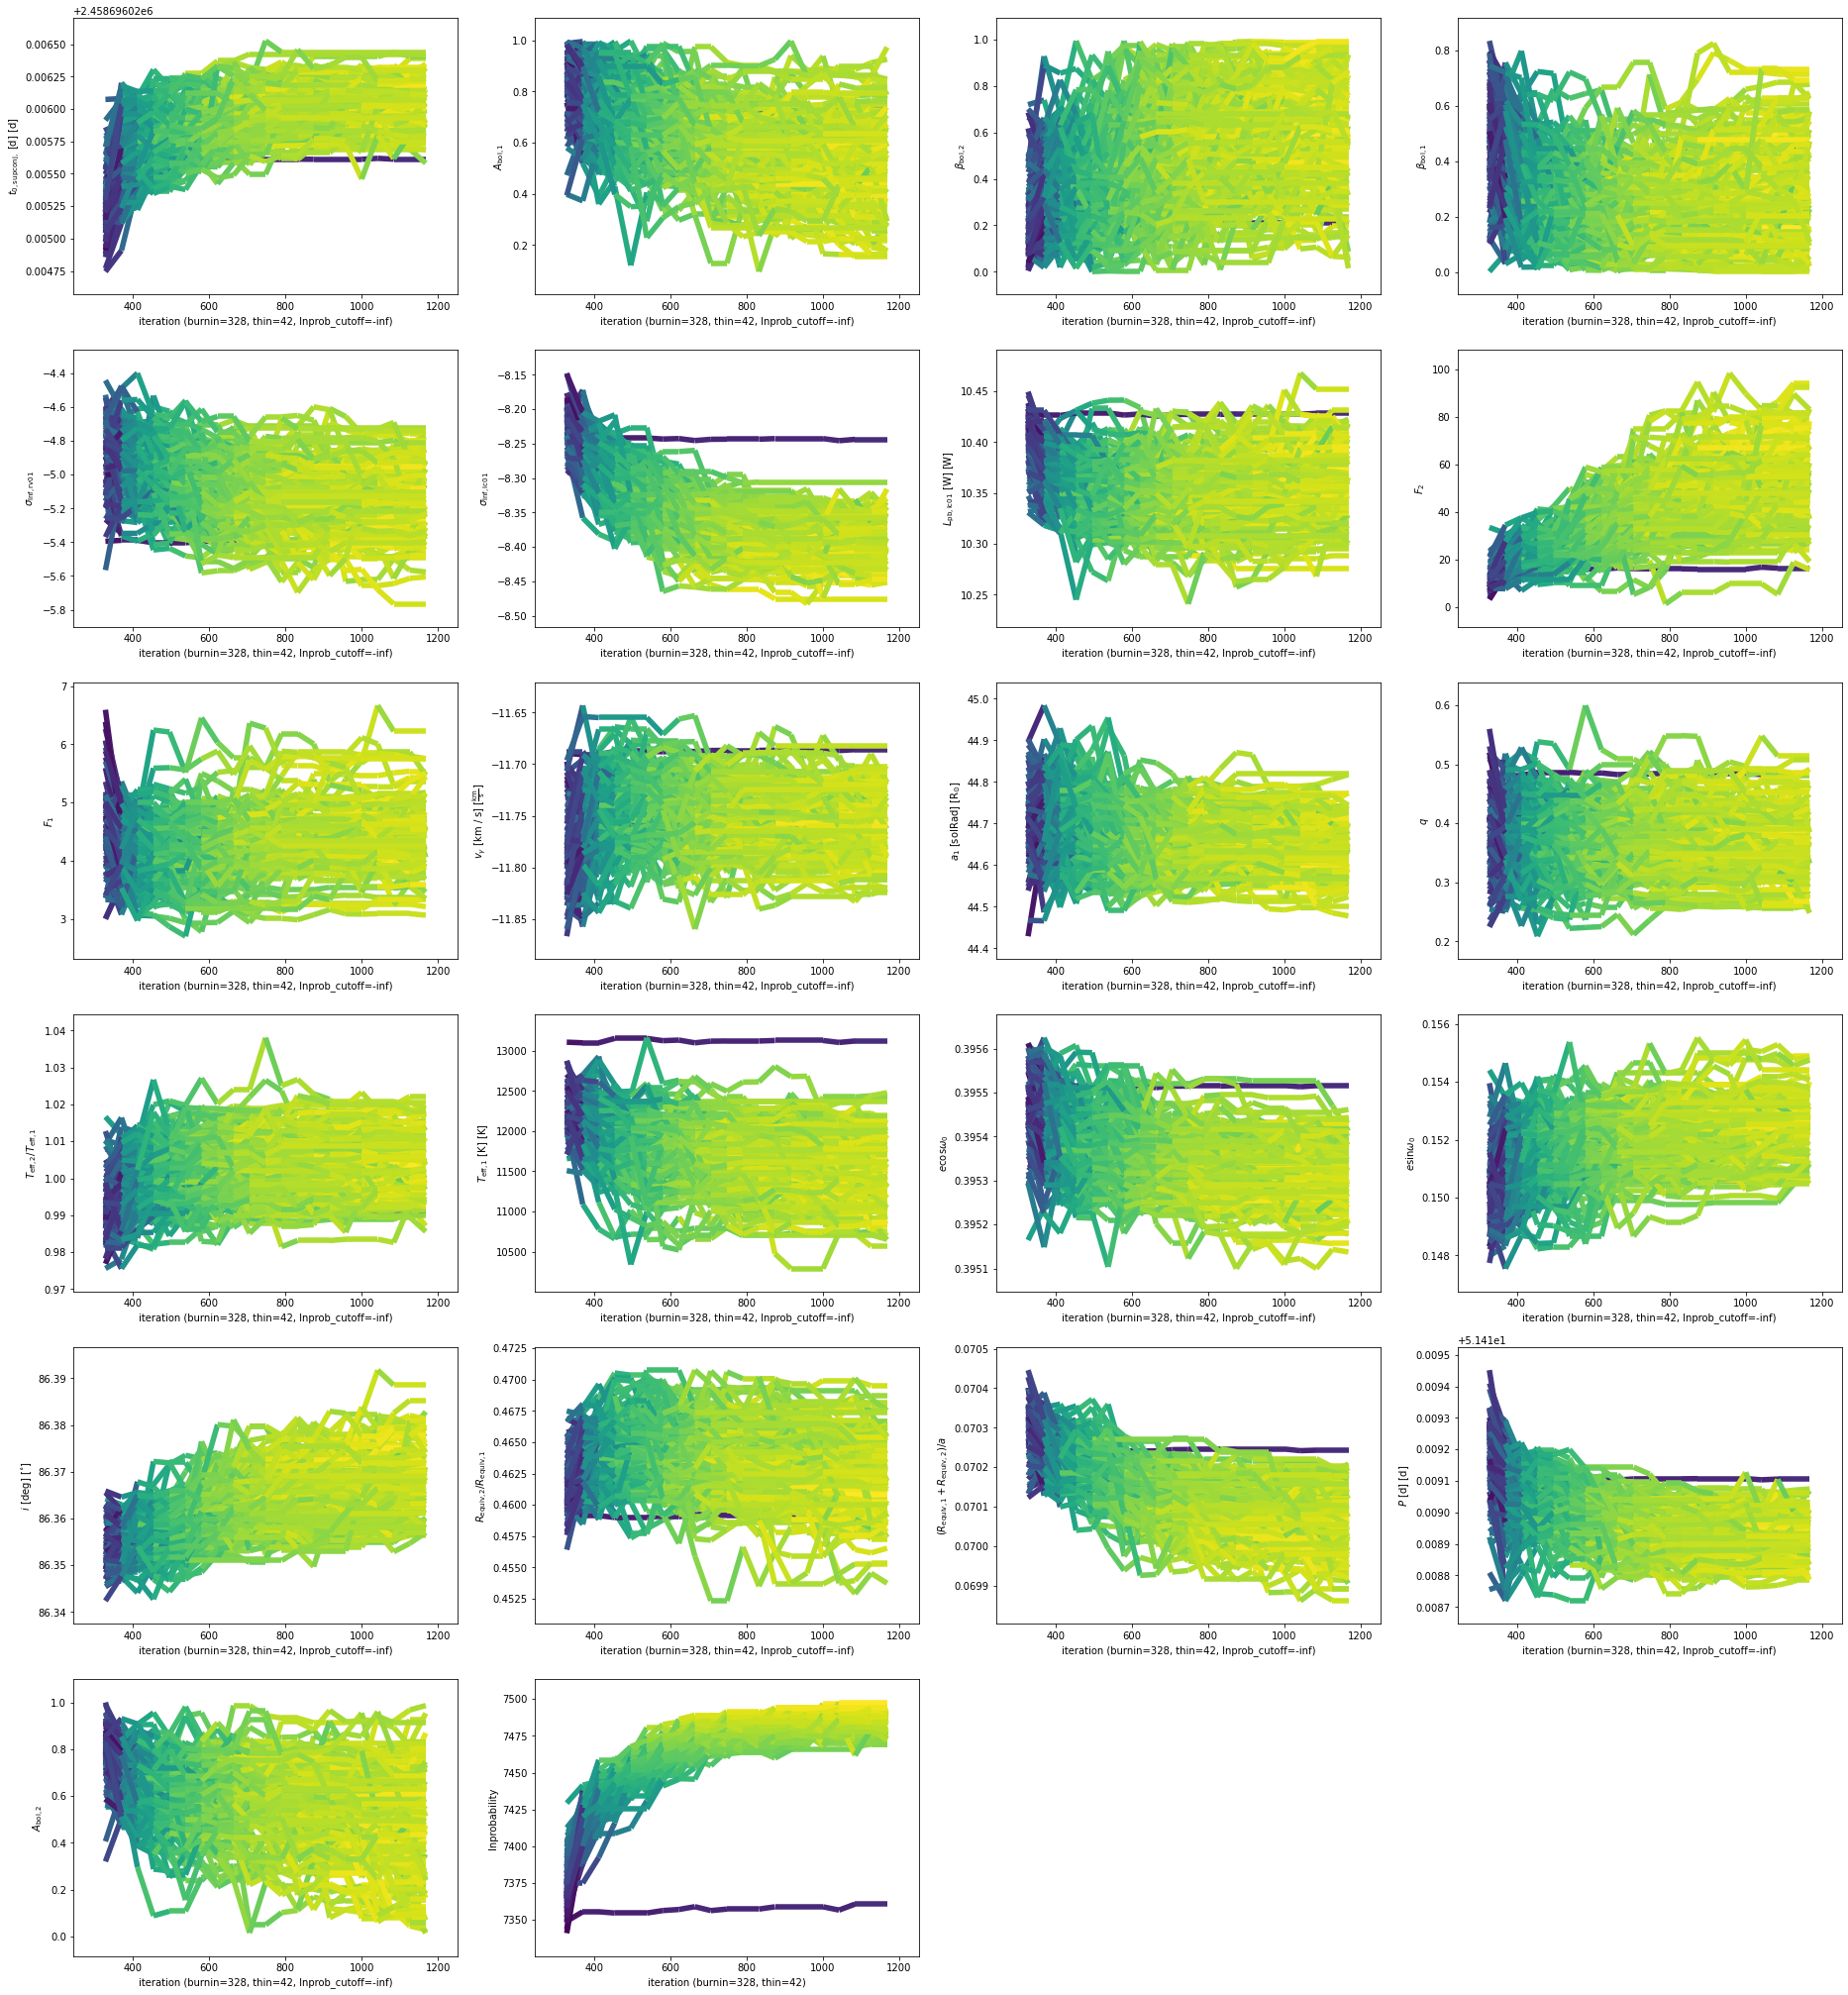

(<autofig.figure.Figure | 22 axes | 4224 call(s)>,
 <Figure size 2304x2592 with 22 Axes>)

In [157]:
%matplotlib inline
b.plot(solution='mcmc_r2', s=0.01, c='lnprobabilities', show=True)

In [185]:
b['value@samples@mcmc_r2'].shape

(1200, 192, 21)

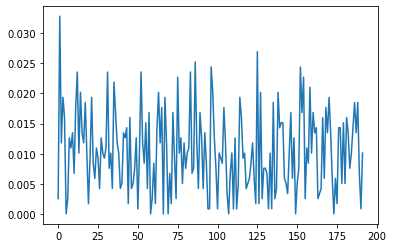

In [161]:
plt.plot(b['value@acceptance_fractions@mcmc_r2'])

In [162]:
#b.resubmit_job(solution='mcmc_r2')

In [163]:
%matplotlib qt
b.plot(solution='mcmc_r2', style='lnprobability', s=0.001, show=True)

(<autofig.figure.Figure | 1 axes | 192 call(s)>,
 <Figure size 1152x864 with 1 Axes>)

(None, <Figure size 3268.8x3268.8 with 441 Axes>)

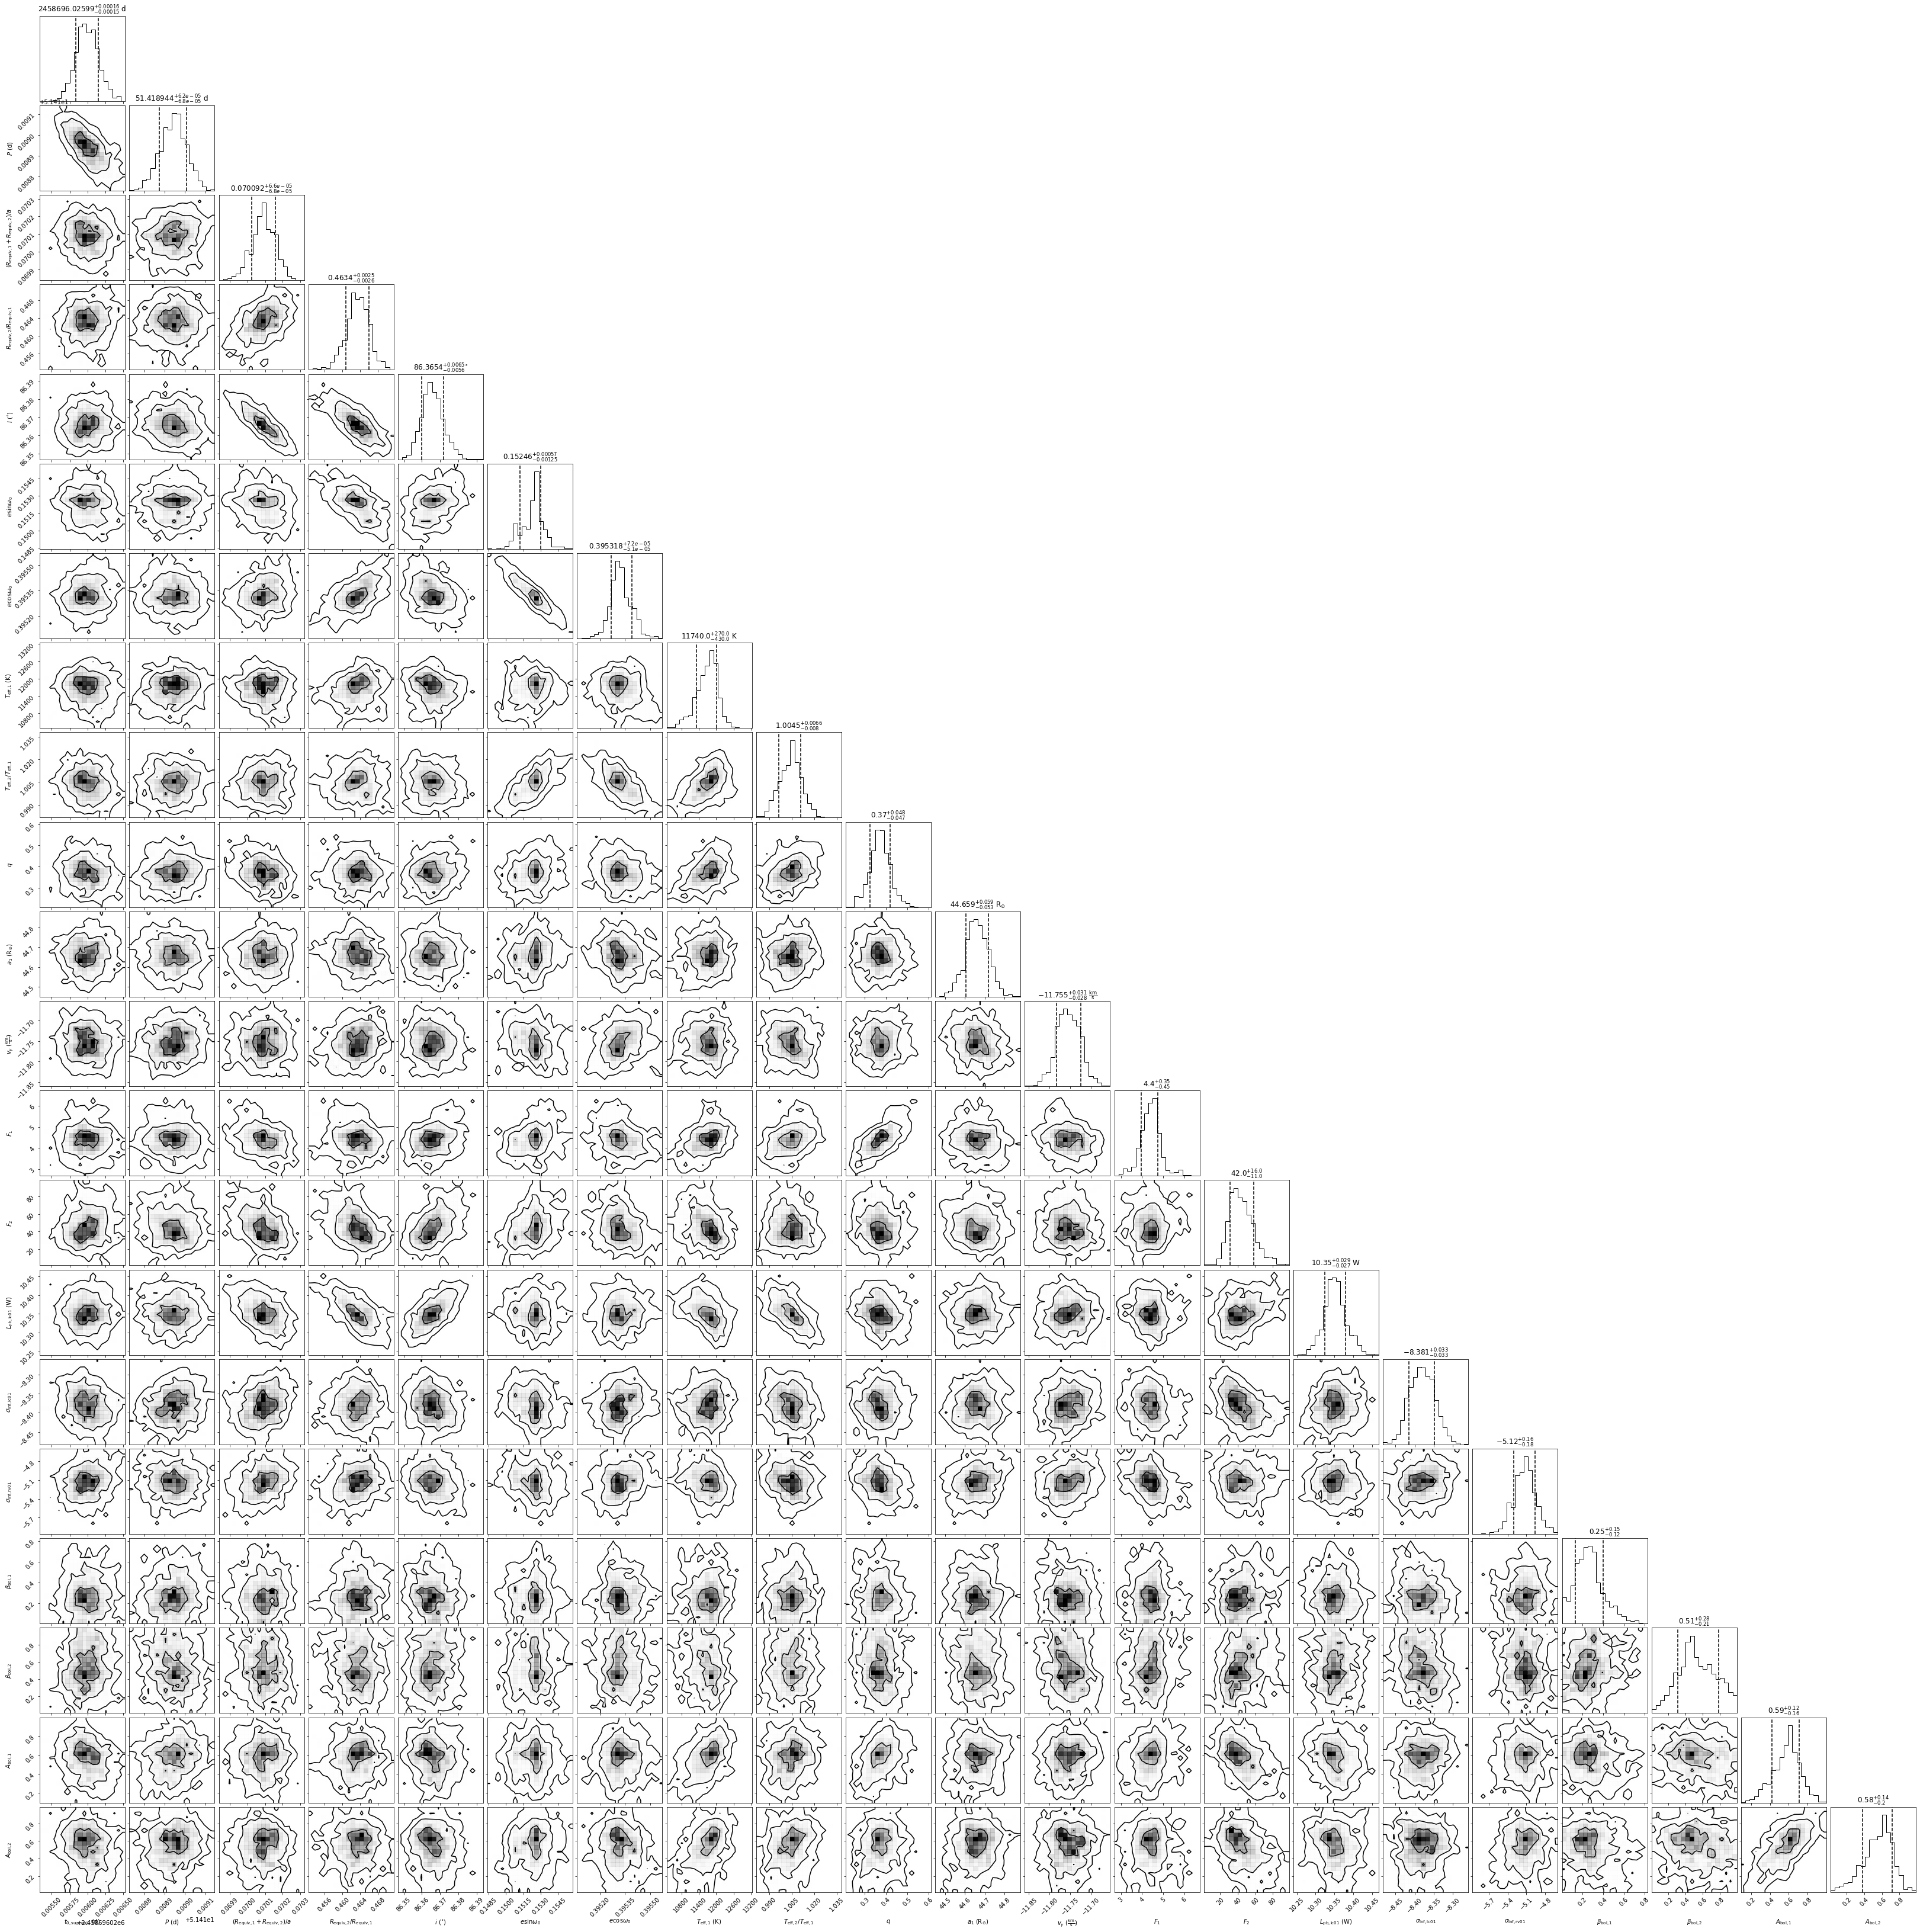

In [169]:
%matplotlib inline
b.plot(solution='mcmc_r2', style='corner', lnprob_cutoff=7400, 
       burnin=600, thin=1, 
       rasterized=True,
       show_titles=True, 
       smooth=0.5, 
       quantiles=[0.16, 0.5, 0.84], 
       fill_contours=False, 
       plot_datapoints=False,
       show=True)

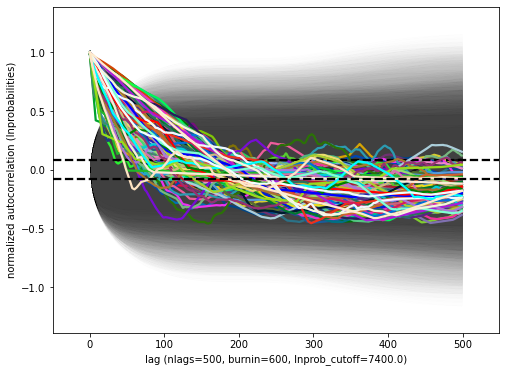

(<autofig.figure.Figure | 1 axes | 386 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [168]:
%matplotlib inline
b.plot(solution='mcmc_r2', style='acf_lnprobabilities', burnin=600, 
       lnprob_cutoff=7400, thin=1, nlags=500, show=True)

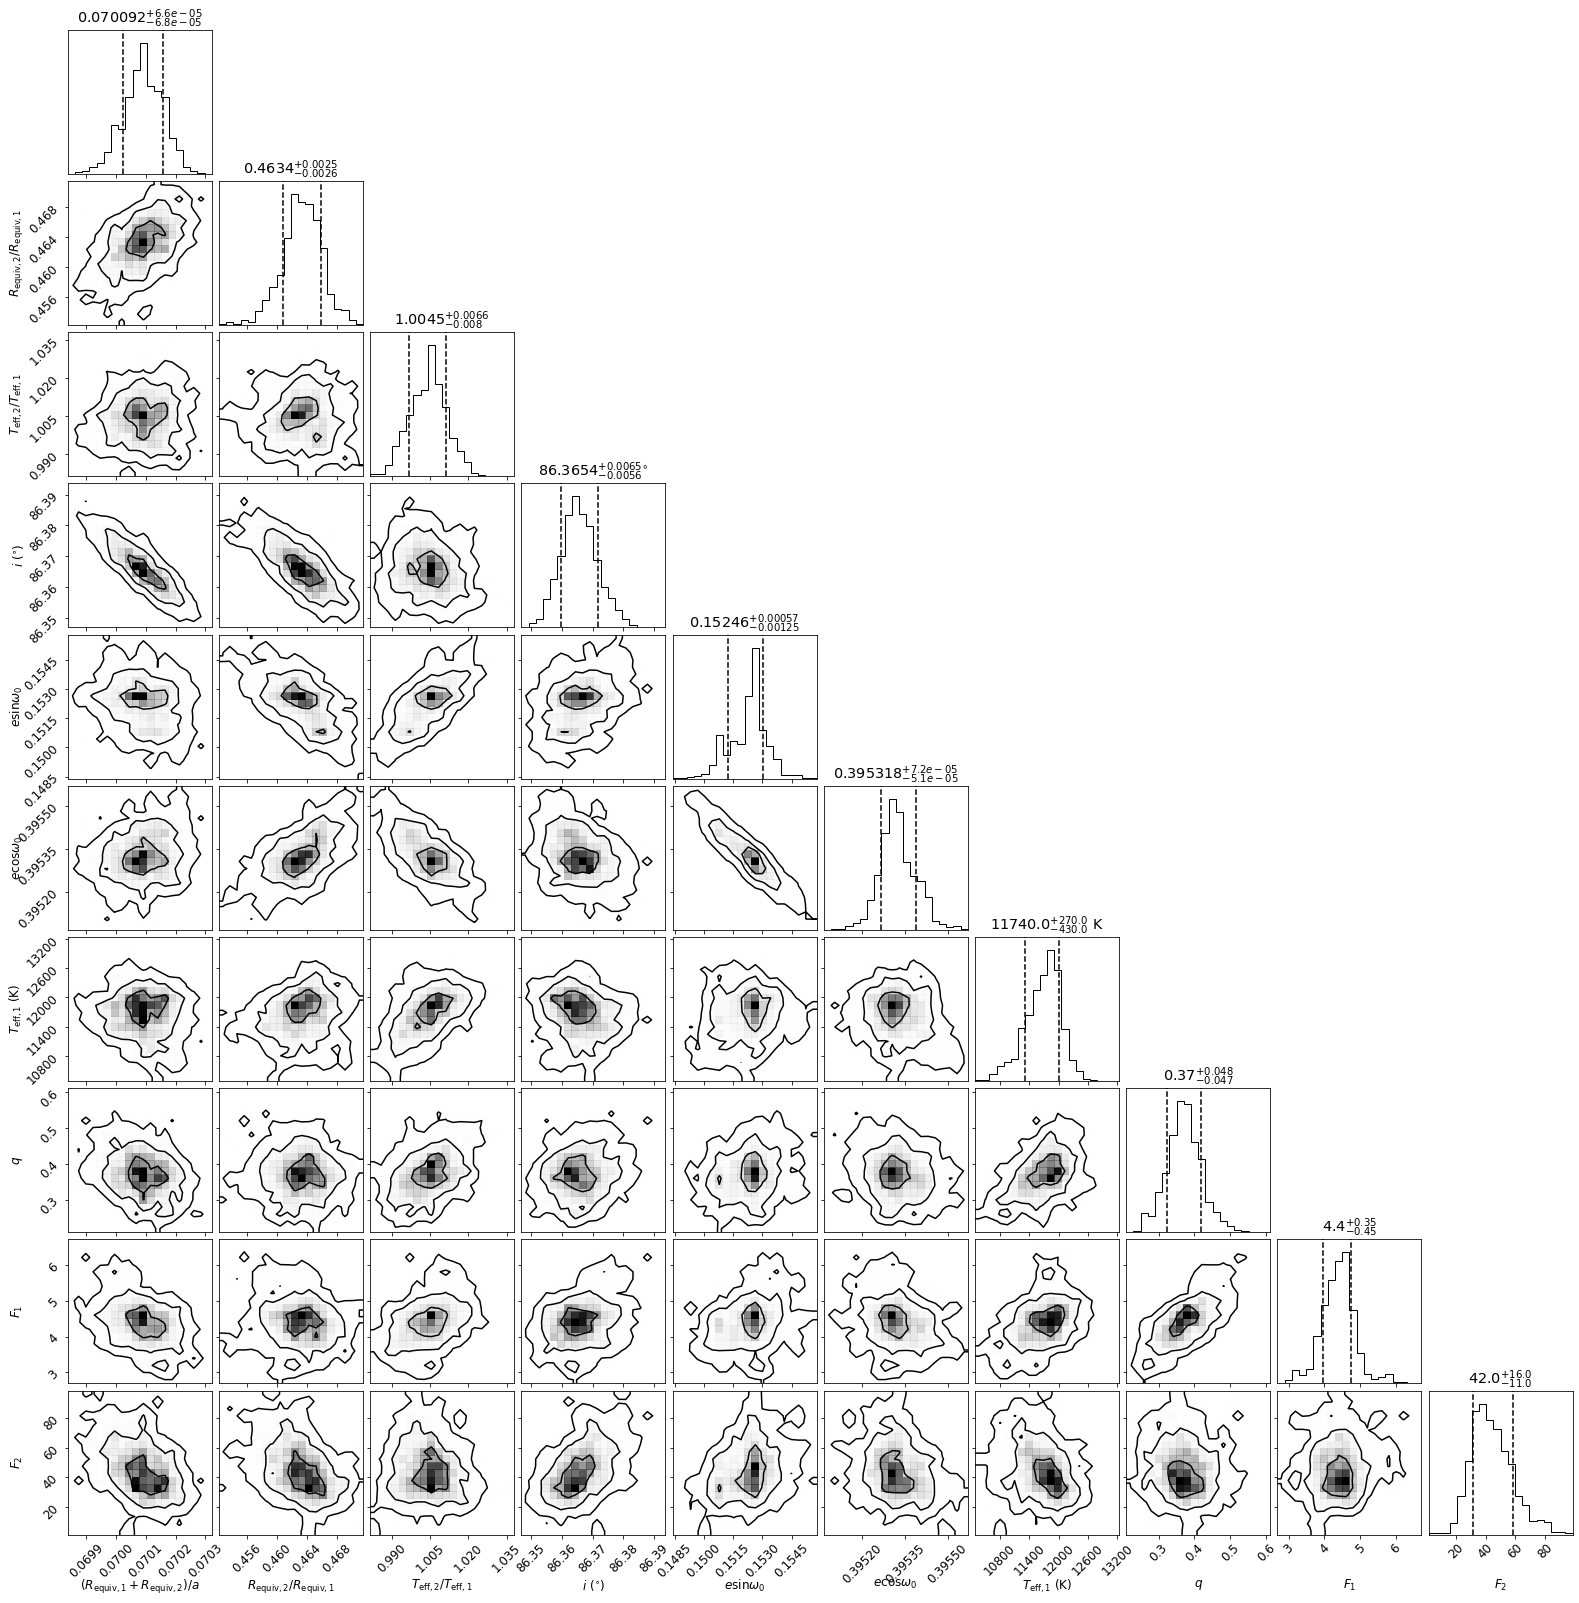

In [172]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 12

b.set_value('latex_repr', component='binary', value=' ')
b.set_value('latex_repr', component='primary', value='1')
b.set_value('latex_repr', component='secondary', value='2')

afig, mplfig = b.plot(style='corner', 
                      adopt_parameters=[
                          'requivsumfrac', 'requivratio', 
                                        'teffratio', 
                          'incl@binary','esinw', 'ecosw', 
                                        'teff@primary', 'q',
                                       'syncpar@primary', 'syncpar@secondary'],
#                       distributions_convert='mvgaussian',
                      solution='mcmc_r2', 
                      burnin=600, thin=1, 
                      lnprob_cutoff = 7400, rasterized=True,
                      show_titles=True, 
                      smooth=0.5, 
                      quantiles=[0.16, 0.5, 0.84], 
                      fill_contours=False, 
                      plot_datapoints=False);

In [173]:
import numpy as np
plabels = ['t0', 'P', 'r1+r2', 'r2/r1', 'i', 'esinw', 'ecosw', 'Teff1', 'Teff2/Teff1', 'q', 'sma', 'vgamma',
          'F1', 'F2', 'pblum1', 'lnf_lc', 'lnf_rv', 'gravbol1', 'gravbol2', 'alb1', 'alb2', 
           'ldcoeff1[0]', 'ldcoeff1[1]', 'ldcoeff2[0]', 'ldcoeff2[1]']
dan_means = [2458696.019915, 51.418877, 0.070419, 0.4659, 86.3632, 0.15586, 0.395055, 9809, 1.051, 0.6653, 44.521, -11.7,
            6.35, 17.7, 10.216, -8.445, -4.89, np.nan, np.nan, np.nan, np.nan, 0.072, 0.487, 0.365, 0.121]
dan_uncs = [7e-5, 2.6e-5, 0.0001, 0.0031, 0.008, 0.001, 6.5e-5, 100, 0.009, 0.007, 0.07, 0.022,
           0.6, 8, 0.032, 0.016, 0.15, np.nan, np.nan, np.nan, np.nan, 0.081, 0.12, 0.126, 0.194]

In [174]:
phoebe_solution = b.uncertainties_from_distribution_collection('mcmc_r2', 
                                                               burnin=600, 
                                                               lnprob_cutoff=7400,
                                                               tex=False)

means_phoebe = phoebe_solution[:,1]
uncs_phoebe = np.diff(phoebe_solution, axis=1).max(axis=1)

In [175]:
uncs_phoebe

array([1.59747899e-04, 6.99431477e-05, 6.86927713e-05, 2.61544198e-03,
       6.42581139e-03, 1.24513517e-03, 7.25302186e-05, 4.29645046e+02,
       8.25418335e-03, 4.70111664e-02, 5.95143557e-02, 3.05289965e-02,
       4.45363132e-01, 1.56890728e+01, 2.96068458e-02, 3.46360210e-02,
       1.84270146e-01, 1.49465726e-01, 2.76637040e-01, 1.66904120e-01,
       1.99362006e-01])

In [176]:
means_phoebe = np.hstack((means_phoebe, np.array([np.nan, np.nan, np.nan, np.nan])))
uncs_phoebe = np.hstack((uncs_phoebe, np.array([np.nan, np.nan, np.nan, np.nan])))

/Users/angela/miniconda3/envs/phoebe-devel/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


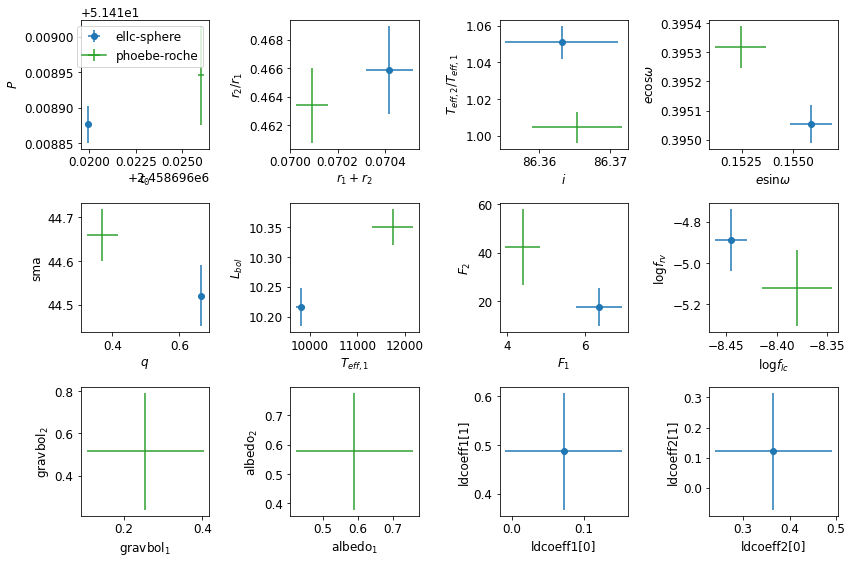

In [177]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

i=0
for xlabel, ylabel, xlabel_tex, ylabel_tex in zip(['t0', 'r1+r2','i','esinw','q','Teff1', 'F1', 'lnf_lc', 'gravbol1','alb1', 'ldcoeff1[0]', 'ldcoeff2[0]'],
                          ['P','r2/r1','Teff2/Teff1','ecosw','sma','pblum1', 'F2', 'lnf_rv', 'gravbol2','alb2', 'ldcoeff1[1]', 'ldcoeff2[1]'],
                            ['$t_0$', '$r_1+r_2$','$i$','$e\sin\omega$','$q$','$T_{eff,1}$', '$F_1$', '$\log f_{lc}$', 'gravbol$_1$','albedo$_1$', 'ldcoeff1[0]', 'ldcoeff2[0]'],
                          ['$P$','$r_2/r_1$','$T_{eff,2}/T_{eff,1}$','$e\cos\omega$','sma','$L_{bol}$', '$F_2$', '$\log f_{rv}$', 'gravbol$_2$','albedo$_2$', 'ldcoeff1[1]', 'ldcoeff2[1]']):
    xind = plabels.index(xlabel)
    yind = plabels.index(ylabel)
    axes.flatten()[i].errorbar(x=dan_means[xind], y=dan_means[yind], xerr=dan_uncs[xind], yerr=dan_uncs[yind], 
                               fmt='o', c='C0', label='ellc-sphere')
    axes.flatten()[i].errorbar(x=means_phoebe[xind], y=means_phoebe[yind], xerr=uncs_phoebe[xind], yerr=uncs_phoebe[yind], 
                               c='C2', label='phoebe-roche')
    axes.flatten()[i].set_xlabel(xlabel_tex)
    axes.flatten()[i].set_ylabel(ylabel_tex)
    i+=1
axes[0][0].legend()
fig.tight_layout()
# fig.savefig('uncs_comparison.png', dpi=300, rasterized=True)
plt.show()

In [178]:
# mfig = b.plot_distribution_collection(solution='mcmc_r2', burnin = 600, thin=1,
#                                    parameters=['mass@primary', 'mass@secondary', 'logg@primary',
#                                               'requiv@primary', 'requiv@secondary',
#                                               'teff@primary', 'teff@secondary'],
#                                    show=True)

In [179]:
# mfig.savefig('derived.png')

In [180]:
b.servers

['terra_phoebe_compute', 'terra']

In [181]:
b.adopt_solution(solution='mcmc_r2', burnin=700, lnprob_cutoff=7400, thin=1)
b.run_compute(compute='phoebe01', use_server='terra_phoebe_compute', model='mcmc_progress', overwrite=True)

# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-*"
# crimpl: ssh terra "pwd"
# crimpl: ssh terra "ls /home/users/angela/crimpl/crimpl-job-2021.06.29-09.08.34/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda -V"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; conda info --envs"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-envs/*"
# crimpl: ssh terra "ls -d ~/crimpl/crimpl-job-2021.06.29-09.08.34/crimpl-envs/*"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; mkdir -p /home/users/angela/crimpl/crimpl-job-2021.06.29-09.08.34"
# crimpl: scp crimpl_submit_script.sh /Users/angela/Documents/WORK/PHOETTING/adra-paper/_UtdXOGWVKXnUhobPwMJGKkCYjWCeDv.py terra:/home/users/angela/crimpl/crimpl-job-2021.06.29-09.08.34/
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo '_UtdXOGWVKXnUhobPwMJGKkCYjWCeDv.py' >> /home/users/angela/crimpl/crimpl-job-2021.06.29-09.08.34/crimpl-input-files.list"
# crimpl: ssh terra "source ~/crimpl/exportpath.sh; echo 'phoebe-devel' > /home/users/ang

<ParameterSet: 5 parameters | kinds: rv, lc>

In [182]:
%matplotlib qt
_ = b.plot(kind='lc', model=['mcmc_progress'], 
           x='phases', y='fluxes', 
           s={'dataset': 0.005, 'model': 0.005},
           marker={'dataset': '.'}, 
           legend=True,)
_ = b.plot(kind='lc', model=['mcmc_progress'], 
           x='phases', y='residuals', 
           z={'dataset': 0, 'model': 1}, 
           legend= True,
           show=True)

In [110]:
%matplotlib qt
_ = b.plot(kind='rv', model=['mcmc_progress'], 
           x='phases', y='rvs', 
           s={'dataset': 0.005, 'model': 0.005},
           marker={'dataset': '.'},
           legend=True,)
_ = b.plot(kind='rv', model=['mcmc_progress'], 
           x='phases', y='residuals', 
           z={'dataset': 0, 'model': 1},
           legend=True,
           show=True)

In [186]:
b.uncertainties_from_distribution_collection('mcmc_r2', burnin=600, lnprob_cutoff=7400, tex=True)

t0_supconj@binary = 2458696.02599 +0.00016 -0.00016  d
period@binary = 51.418946 +6.2e-05 -7e-05  d
requivsumfrac@binary = 0.070092 +6.8e-05 -6.9e-05  
requivratio@binary = 0.4634 +0.0025 -0.0026  
incl@binary = 86.3653 +0.0064 -0.0057  deg
esinw@binary = 0.15245 +0.00056 -0.00125  
ecosw@binary = 0.395319 +7.3e-05 -5.1e-05  
teff@primary = 11740.0 +270.0 -430.0  K
teffratio@binary = 1.0045 +0.0066 -0.0083  
q@binary = 0.37 +0.047 -0.046  
sma@primary = 44.659 +0.06 -0.053  solRad
vgamma = -11.755 +0.031 -0.028  km / s
syncpar@primary = 4.4 +0.35 -0.45  
syncpar@secondary = 42.0 +16.0 -12.0  
pblum@lc01 = 10.35 +0.03 -0.027  W
sigmas_lnf@lc01 = -8.38 +0.035 -0.034  
sigmas_lnf@rv01 = -5.12 +0.16 -0.18  
gravb_bol@primary = 0.25 +0.15 -0.12  
gravb_bol@secondary = 0.51 +0.28 -0.21  
irrad_frac_refl_bol@primary = 0.59 +0.12 -0.17  
irrad_frac_refl_bol@secondary = 0.58 +0.14 -0.2  